            000568  000858  600519  600809  002304
date                                              
2018-05-10   66.05   77.98  701.99   60.99  130.01
2018-05-11   64.90   77.06  714.33   61.62  130.00
2018-05-14   66.98   78.32  717.66   60.30  132.00
2018-05-15   66.50   79.38  742.00   62.28  133.00
2018-05-16   66.90   79.17  743.23   62.67  131.20
--------------------------------------------------
              000568    000858    600519    600809    002304
date                                                        
2018-05-11 -0.017411 -0.011798  0.017579  0.010330 -0.000077
2018-05-14  0.032049  0.016351  0.004662 -0.021422  0.015385
2018-05-15 -0.007166  0.013534  0.033916  0.032836  0.007576
2018-05-16  0.006015 -0.002646  0.001658  0.006262 -0.013534
2018-05-17 -0.029297 -0.026525 -0.012123 -0.002713 -0.003811
****************************************************************
              000568    000858    600519    600809    002304  Portfolio
date                        

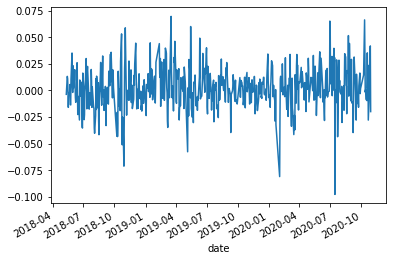

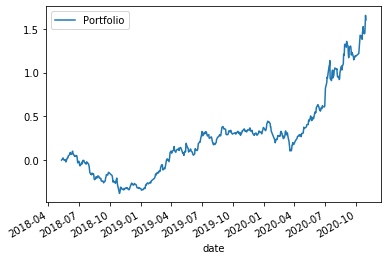

************************************************************
              000568    000858    600519    600809    002304  Portfolio  \
date                                                                      
2018-05-11 -0.017411 -0.011798  0.017579  0.010330 -0.000077  -0.003743   
2018-05-14  0.032049  0.016351  0.004662 -0.021422  0.015385   0.013165   
2018-05-15 -0.007166  0.013534  0.033916  0.032836  0.007576   0.010933   
2018-05-16  0.006015 -0.002646  0.001658  0.006262 -0.013534  -0.000563   
2018-05-17 -0.029297 -0.026525 -0.012123 -0.002713 -0.003811  -0.016007   

            Portfolio_EW  
date                      
2018-05-11     -0.000276  
2018-05-14      0.009405  
2018-05-15      0.016139  
2018-05-16     -0.000449  
2018-05-17     -0.014894  


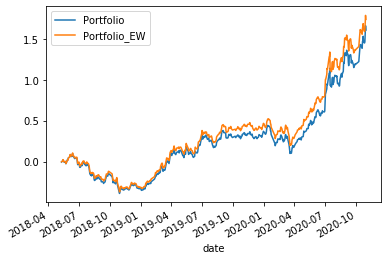

********************************************************************************************
              000568    000858    600519    600809    002304  Portfolio  \
date                                                                      
2018-05-11 -0.017411 -0.011798  0.017579  0.010330 -0.000077  -0.003743   
2018-05-14  0.032049  0.016351  0.004662 -0.021422  0.015385   0.013165   
2018-05-15 -0.007166  0.013534  0.033916  0.032836  0.007576   0.010933   
2018-05-16  0.006015 -0.002646  0.001658  0.006262 -0.013534  -0.000563   
2018-05-17 -0.029297 -0.026525 -0.012123 -0.002713 -0.003811  -0.016007   

            Portfolio_EW  Portfolio_MVal  
date                                      
2018-05-11     -0.000276        0.011432  
2018-05-14      0.009405        0.006409  
2018-05-15      0.016139        0.027852  
2018-05-16     -0.000449        0.000600  
2018-05-17     -0.014894       -0.013012  


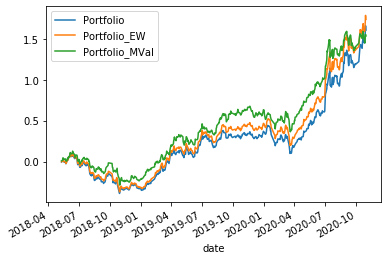

****************************************************************
          000568    000858    600519    600809    002304
000568  1.000000  0.840363  0.082355  0.061486  0.714572
000858  0.840363  1.000000  0.123689  0.076814  0.737040
600519  0.082355  0.123689  1.000000  0.720949  0.081875
600809  0.061486  0.076814  0.720949  1.000000  0.062169
002304  0.714572  0.737040  0.081875  0.062169  1.000000


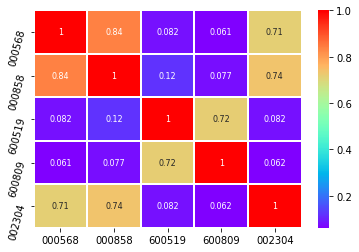

          000568    000858    600519    600809    002304
000568  0.187085  0.145923  0.011580  0.011688  0.127417
000858  0.145923  0.161167  0.016143  0.013553  0.121980
600519  0.011580  0.016143  0.105686  0.103006  0.010973
600809  0.011688  0.013553  0.103006  0.193151  0.011264
002304  0.127417  0.121980  0.010973  0.011264  0.169950
****************************************************************
0.30469446759824


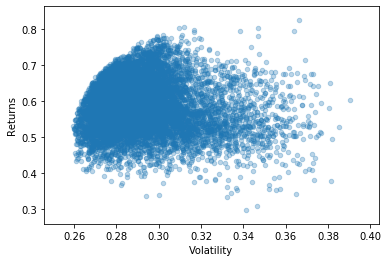

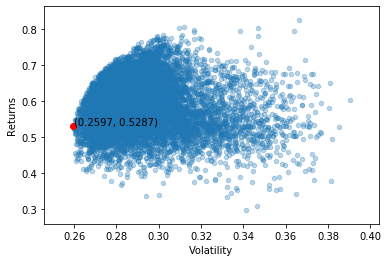

****************************************************************
[0.06416921 0.18199243 0.5278164  0.06416248 0.16185948]


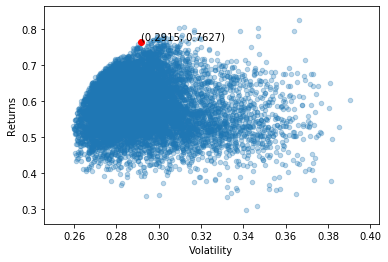

****************************************************************
[0.01271975 0.44219056 0.14142236 0.39549365 0.00817368]


In [12]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 创建空的DataFrame变量，用于存储股票数据
StockPrices = pd.DataFrame()
market_value_list = []  # 存储每支股票的平均市值
# 创建股票代码的列表
ticker_list = ['000568', '000858', '600519', '600809', '002304']
# 使用循环，挨个获取每只股票的数据，并存储每日收盘价
for ticker in ticker_list:
    stock_data = pd.read_csv('stock_data/' + ticker + '.csv', parse_dates=[0], index_col=0)
    # print(stock_data)
    stock_data = stock_data.sort_values(by='date')
    stock_data = stock_data.loc['2018-05-10':'2020-10-30']
    StockPrices[ticker] = stock_data['close']  # 获取每支股票的收盘价
    #print(StockPrices[ticker])
    # 将每支股票的市值均值存入列表中
    market_value_list.append(stock_data['ma5'].mean())
StockPrices.index.name = 'date'  # 日期为索引列
# 输出数据的前5行
print(StockPrices.head())

# 计算每日收益率，并丢弃缺失值
StockReturns = StockPrices.pct_change().dropna()
# 打印前5行数据
print('--------------------------------------------------')
print(StockReturns.head())

# 将收益率数据拷贝到新的变量 stock_return 中，这是为了后续调用的方便
stock_return = StockReturns.copy()

#设置组合权重，存储为numpy数组类型
portfolio_weights = np.array([0.32, 0.15, 0.10, 0.18, 0.25])
# 计算加权的股票收益
WeightedReturns = stock_return.mul(portfolio_weights, axis=1)
# 计算投资组合的收益
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
# 打印前5行数据
print('****************************************************************')
print(StockReturns.head())


# 绘制组合收益随时间变化的图
StockReturns.Portfolio.plot()
plt.show()


# 定义累积收益曲线绘制函数
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1 + StockReturns[name]).cumprod() - 1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.show()

# 计算累积的组合收益，并绘图
cumulative_returns_plot(['Portfolio'])


# 设置投资组合中股票的数目
numstocks = 5
# 平均分配每一项的权重
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
# 计算等权重组合的收益
StockReturns['Portfolio_EW'] = stock_return.mul(portfolio_weights_ew, axis=1).sum(axis=1)
# 打印前5行数据
print('************************************************************')
print(StockReturns.head())
# 绘制累积收益曲线
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])


#将上述获得的每支股票的平均市值转换为数组
market_values=np.array(market_value_list)
# 计算市值权重
market_weights = market_values / np.sum(market_values)
# 计算市值加权的组合收益
StockReturns['Portfolio_MVal'] = stock_return.mul(market_weights, axis=1).sum(axis=1)
# 打印前5行数据
print('********************************************************************************************')
print(StockReturns.head())
# 绘制累积收益曲线
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MVal'])

# 计算相关矩阵
correlation_matrix = stock_return.corr()
# 输出相关矩阵
print('****************************************************************')
print(correlation_matrix)

import seaborn as sns
#创建热图
sns.heatmap(correlation_matrix,annot=True,cmap='rainbow',linewidths=1.0,annot_kws={'size':8})
plt.xticks(rotation=0)
plt.yticks(rotation=75)
plt.show()

# 计算协方差矩阵
cov_mat = stock_return.cov()
# 年化协方差矩阵
cov_mat_annual = cov_mat * 252
# 输出协方差矩阵
# print('****************************************************************')
print(cov_mat_annual)

# 设置组合权重，存储为numpy数组类型
portfolio_weights = np.array([0.32, 0.15, 0.10, 0.18, 0.25])
# 计算投资组合的标准差
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print('****************************************************************')
print(portfolio_volatility)

# 设置模拟的次数
number = 10000
# 设置空的numpy数组，用于存储每次模拟得到的权重、收益率和标准差
random_p = np.empty((number, 7))
# 设置随机数种子，这里是为了结果可重复
np.random.seed(7)

# 循环模拟10000次随机的投资组合
for i in range(number):
    # 生成5个随机数，并归一化，得到一组随机的权重数据
    random5 = np.random.random(5)
    random_weight = random5 / np.sum(random5)

    # 计算年平均收益率
    mean_return = stock_return.mul(random_weight, axis=1).sum(axis=1).mean()
    annual_return = (1 + mean_return) ** 252 - 1

    # 计算年化标准差，也成为波动率
    random_volatility = np.sqrt(np.dot(random_weight.T, np.dot(cov_mat_annual, random_weight)))

    # 将上面生成的权重，和计算得到的收益率、标准差存入数组random_p中
    random_p[i][:5] = random_weight
    random_p[i][5] = annual_return
    random_p[i][6] = random_volatility

# 将Numpy数组转化为DataF数据框
RandomPortfolios = pd.DataFrame(random_p)
# 设置数据框RandomPortfolios每一列的名称
RandomPortfolios.columns = [ticker + '_weight' for ticker in ticker_list] + ['Returns', 'Volatility']

# 绘制散点图
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
plt.show()


# 找到标准差最小数据的索引值
min_index = RandomPortfolios.Volatility.idxmin()

# 在收益-风险散点图中突出风险最小的点
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[min_index, 'Volatility']
y = RandomPortfolios.loc[min_index, 'Returns']
plt.scatter(x, y, color='red')
# 将该点坐标显示在图中并保留四位小数
plt.text(np.round(x, 4), np.round(y, 4), (np.round(x, 4), np.round(y, 4)), ha='left', va='bottom', fontsize=10)
plt.show()

# 设置投资组合中股票的数目
numstocks = 5
# 提取最小波动组合对应的权重, 并转换成Numpy数组
GMV_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])
# 计算GMV投资组合收益
StockReturns['Portfolio_GMV'] = stock_return.mul(GMV_weights, axis=1).sum(axis=1)
#输出风险最小投资组合的权重
print('****************************************************************')
print(GMV_weights)

# 设置无风险回报率为0
risk_free = 0
# 计算每项资产的夏普比率
RandomPortfolios['Sharpe'] = (RandomPortfolios.Returns - risk_free) / RandomPortfolios.Volatility
# 绘制收益-标准差的散点图，并用颜色描绘夏普比率
# plt.scatter(RandomPortfolios.Volatility, RandomPortfolios.Returns, c=RandomPortfolios.Sharpe)
# plt.colorbar(label='Sharpe Ratio')
# plt.show()


# 找到夏普比率最大数据对应的索引值
max_index = RandomPortfolios['Sharpe'].idxmax()
# 在收益-风险散点图中突出夏普比率最大的点 
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[max_index,'Volatility']
y = RandomPortfolios.loc[max_index,'Returns']
plt.scatter(x, y, color='red')
#将该点坐标显示在图中并保留四位小数
plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)
plt.show()

# 设置投资组合中股票的数目
numstocks = 5
# 提取最大夏普比率组合对应的权重，并转化为numpy数组
MSR_weights = np.array(RandomPortfolios.iloc[max_index, 0:numstocks])
# 计算MSR组合的收益
StockReturns['Portfolio_MSR'] = stock_return.mul(MSR_weights, axis=1).sum(axis=1)
#输出夏普比率最大的投资组合的权重
print('****************************************************************')
print(MSR_weights)



